In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# Линейные модели классификации

## Напоминание

__Обозначения:__

$\mathcal X \; - \; \; $ пространство объектов;

$\mathcal Y \; - \; \; $ пространство ответов;

$x \; - \; \; $ объект, для которого требуется сделать предсказание;

$y \; - \; \; $ правильный ответ на объекте $x$;

$X = (\bar x_i, y_i)_{i=1}^\ell \; - \; \; $ обучающая выборка;

$\bar x = (x^1, x^2, ... , x^d) \; - \; \; $ признаковое описание объекта $x$;

$a(x) \; - \; \; $ модель (алгоритм обучения);

$Q(a, X) \; - \; \; $ функционал ошибки алгоритма $a$ на обучающей выборке $X$.

Задача __обучения__ состоит в подборе такого алгоритма $a$ из некоторого
семейства $\mathcal A$  алгоритмов, для
которого достигается минимум функционала ошибки на обучающей выборке $X$:
$$Q(a, X) \; \to \; \min\limits_{a \in \mathcal A}$$

## Задача бинарной классификации

Задача бинарной классификации возникает в случае, когда пространство возможных ответов представляет собой множество $\mathcal Y = \{-1, 1\}$ (либо $\mathcal Y = \{0,1\}$).

Множество объектов, которые имеют один и тот же ответ, будем называть классом.

### Модель линейного классификатора

Линейная модель классификации определяется как

$$a(x) = \DeclareMathOperator{\sign}{sign} \sign \left (w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 + ... + w_d \cdot x^d \right ) = \sign \left ( \sum_{j=1}^{d}{w_j \cdot x^j} + w_o\right )$$

где   
$w_0 \; - \; \; $ свободный коэффициент,   

$w_j, \; \; j = 1, 2, ... , d \; - \; \; $ веса признаков,

$\sign(z)=\begin{cases}
   1, &\text{при $z>0$}\\
   0, &\text{при $z=0$}\\
   -1, &\text{при $z<0$}
 \end{cases} \; .$

Отметим, что хотя функция $\sign(z)$ и может быть равна 0 при $z = 0$, но в множество ответов ноль не входит.

По аналогии с моделью линейной регрессии, можно переписать модель линейного классификатора более компактно:

$$a(x) = \sign \langle \bar w, \bar x \rangle$$
где

$\langle \bar w, \bar x \rangle \; \; - $ скалярное произведение вектора весов $\bar w = (w_0, w_1, w_2, ... , w_d) \;$ и вектора $\bar x = (x^0, x^1, x^2, ... , x^d)$,

$x^0=1 \; \; -$ дополнительный константный признак, равный 1 на каждом объекте.

Проиллюстрируем работу линейного классификатора на примере небольшого искусственно сгенерированного набора данных, состоящего из 50 объектов:

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Признак 1,Признак 2,Класс
0,4.460749,9.796388,1
1,-5.517731,18.275677,-1
2,-9.150128,9.998592,-1
3,-2.171557,1.890545,-1
4,-7.573353,10.585523,-1


Визуализируем данные. Для этого построим диаграмму рассеяния и обозначим объекты разных классов разными цветами:

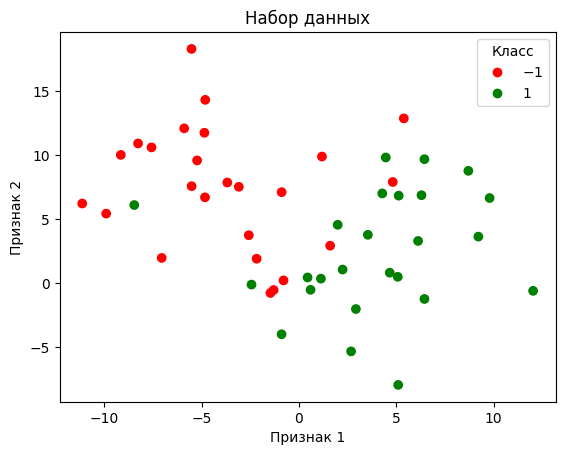

In [3]:
# используем свою палитру цветов
colors = ListedColormap(['red', 'green'])
# диаграмма рассеяния
scatter = plt.scatter(data['Признак 1'], data['Признак 2'], c=data['Класс'], cmap=colors)
plt.legend(*scatter.legend_elements(), title='Класс')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Набор данных')
plt.show()

Рассмотрим линейный классификатор $a(x) = \sign \left (w_0 + w_1 \cdot x^1 + w_2 \cdot x^2  \right )$, задав значения весов.

Можно получить предсказание классификатора на любом объекте выборки, а также на новом объекте (которого не было в обучающей выборке):

In [4]:
# веса
w_0 = 1
w_1 = 3
w_2 = -1

# Прогноз модели на объекте с индексом i из набора данных
i = 3
wx = w_0 + w_1*data.iloc[i,0] + w_2*data.iloc[i,1]
a_i = np.sign(wx)
print(f'Объект из набора данных {tuple(data.iloc[i,:2])}')
print(f'Скалярное произведение <w,x> = {wx:.2f}')
print(f'Предсказание модели: класс {a_i:.0f}')
print()

# Прогноз модели на новом объекте
X_new = (8,-1)
wx = w_0 + w_1*X_new[0] + w_2*X_new[1]
a_i = np.sign(wx)
print(f'Новый объект {X_new}')
print(f'Скалярное произведение <w,x> = {wx:}')
print(f'Предсказание модели: класс {a_i}')

Объект из набора данных (-2.171556599613131, 1.890545197131038)
Скалярное произведение <w,x> = -7.41
Предсказание модели: класс -1

Новый объект (8, -1)
Скалярное произведение <w,x> = 26
Предсказание модели: класс 1


Рассмотрим уравнение

$$w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 = 0$$

Это уравнение прямой на плоскости, заданное в общем виде. В таком случае

$$a(x) = \sign \left (w_0 + w_1 \cdot x^1 + w_2 \cdot x^2  \right )$$

показывает, __по какую сторону от прямой лежит объект__. Если объект лежит по одну сторону от прямой $\left (w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 > 0 \right )$, то он относится к классу $1$, если по другую $\left (w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 < 0 \right )$ – к классу $-1$.

Получается, что данный классификатор строит __разделяющую прямую__, разделяющую пространство признаков на две области – один класс и другой.

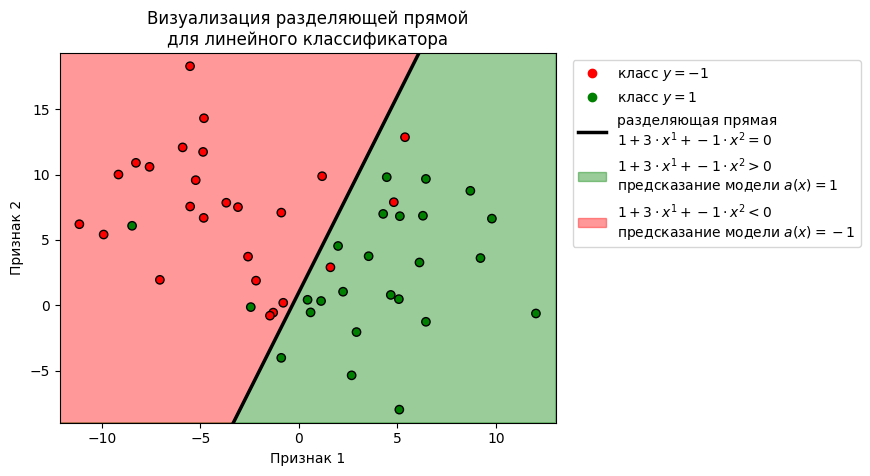

In [5]:
X_1 = data['Признак 1']
X_2 = data['Признак 2']
# крайние значения
x1_min, x1_max = X_1.min()-1, X_1.max()+1
x2_min, x2_max = X_2.min()-1, X_2.max()+1
# разделяющая прямая
x_line = np.array([x1_min, x1_max])
y_line = -(w_0 + w_1 * x_line) / w_2
line = plt.axline(*zip(x_line,y_line), linewidth=2.5, color='k')
# области по разные стороны от разделяющей прямой
area_1 = plt.fill_between(x_line, y_line, np.full(2, x2_min), color='green', alpha=0.4)
area_2 = plt.fill_between(x_line, np.full(2, x2_max), y_line, color='red', alpha=0.4)
# объекты из набора данных
scatter = plt.scatter(X_1, X_2, c=data['Класс'], cmap=colors, edgecolor='k')
# оформление: легенда и названия
handles = scatter.legend_elements()[0]+[line, area_1, area_2]
eq = f'{w_0} + {w_1} \cdot x^1 + {w_2} \cdot x^2'
labels = ([f'класс $y=${i}' for i in scatter.legend_elements()[1]]
          + [f'разделяющая прямая\n${eq}=0$',
          f'${eq}>0$\nпредсказание модели $a(x)=1$',
          f'${eq}<0$\nпредсказание модели $a(x)=-1$'])
plt.legend(handles=handles, labels=labels, bbox_to_anchor=[1.02, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title(f'Визуализация разделяющей прямой\nдля линейного классификатора')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()

В общем случае уравнение $\langle \bar w, \bar x \rangle=w_0 + \sum\limits_{j = 1}^d w_jx_j = 0$
задает __разделяющую гиперплоскость__ в признаковом пространстве. Величина скалярного произведения $\langle \bar w, \bar x \rangle$ пропорциональна расстоянию от гиперплоскости до объекта-точки $x$, а его знак показывает, с какой стороны от гиперплоскости находится данная точка.

### Обучение модели линейного классификатора

В задаче классификации, очевидно, мы хотим видеть как можно больше правильных ответов. Соответствующий функционал ошибки называется __доля правильных ответов__ для объектов выборки (_accuracy_):

$$Q(a,X)=\frac {1}{\ell} \sum\limits_{i=1}^\ell \; [a(\bar x_i) = y_i]$$

где $[z]=\begin{cases}
   1, &\text{если $z$ истинно}\\
   0, &\text{если $z$ ложно}
 \end{cases} \; - \; \; $ нотация Айверсона.

Но поскольку нам удобнее решать задачу минимизации функционала ошибки, то будем вместо этого использовать __долю неправильных ответов__ для
объектов выборки (_error rate_)

$$Q(a,X)=\frac {1}{\ell} \sum\limits_{i=1}^\ell \; [a(\bar x_i) \ne y_i]$$

Таким образом, обучение модели линейного классификатора $a(x) = \sign  \langle \bar w, \bar x \rangle$ это задача минимизации

$$\sum\limits_{i=1}^\ell \; [\sign \langle \bar w, \bar x_i \rangle \ne y_i] \; \to \; \min\limits_{\bar w}$$


Последнее можно переписать следующим образом

$$\sum\limits_{i=1}^\ell \; [y_i \cdot \langle \bar w, \bar x_i \rangle <0] \; \to \; \min\limits_{\bar w}$$

Величина $M_i = y_i \cdot \langle \bar w, \bar x_i \rangle$ называется __отступом__ (*margin*) классификатора.

Посмотрим на значение отступов для некоторых объектов в нашем примере:

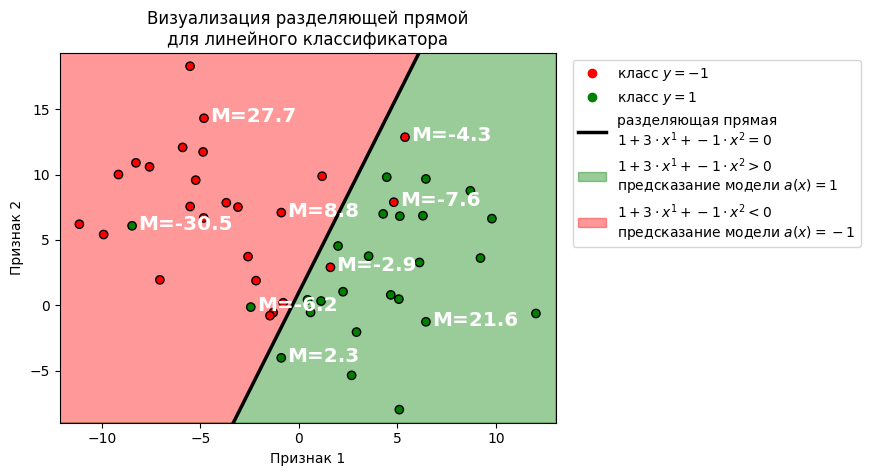

In [6]:
line = plt.axline(*zip(x_line,y_line), linewidth=2.5, color='k')
area_1 = plt.fill_between(x_line, y_line, np.full(2, x2_min), color='green', alpha=0.4)
area_2 = plt.fill_between(x_line, np.full(2, x2_max), y_line, color='red', alpha=0.4)
scatter = plt.scatter(X_1, X_2, c=data['Класс'], cmap=colors, edgecolor='k')
handles = scatter.legend_elements()[0]+[line, area_1, area_2]
eq = f'{w_0} + {w_1} \cdot x^1 + {w_2} \cdot x^2'
labels = ([f'класс $y=${i}' for i in scatter.legend_elements()[1]]
          + [f'разделяющая прямая\n${eq}=0$',
          f'${eq}>0$\nпредсказание модели $a(x)=1$',
          f'${eq}<0$\nпредсказание модели $a(x)=-1$'])
plt.legend(handles=handles, labels=labels, bbox_to_anchor=[1.02, 1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title(f'Визуализация разделяющей прямой\nдля линейного классификатора')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

# считаем отступы
wx = np.array(w_0 + w_1*X_1 + w_2*X_2)
y = np.array(data['Класс'])
M = y * wx
# выбираем объекты с отрицательными отступами
mask = M<0
misclf_margins = M[mask]
misclf_objects = np.array(data.iloc[:,:-1])[mask]
# выбираем несколько объектов с положительными отступами
index = [14, 30, 33, 46]
clf_margins = M[index]
clf_objects = np.array(data.iloc[:,:-1])[index]
margins = np.hstack([misclf_margins , clf_margins])
objects = np.vstack([misclf_objects, clf_objects])
for i,x in enumerate(objects):
  plt.text(x[0]+0.3,x[1]-0.3, s=f'M={margins[i]:.1f}', color='white', fontsize='x-large', fontweight='bold')

Как видим,

* отступ положителен, если ответ классификатора  $\sign\langle \bar w, \bar x_i \rangle$ и метка класса $y_i$ имеют одинаковые знаки, то есть когда класс угадан верно,
* отступ отрицателен, если ответ классификатора  $\sign\langle \bar w, \bar x_i \rangle$ и метка класса $y_i$ имеют разные знаки, то есть когда класс угадан неверно,
* при этом чем больше отступ по модулю, тем больше расстояние от точки-объекта $\bar x_i$ до разделяющей гиперплоскости $\langle\bar w, \bar x_i \rangle = 0$, то есть тем больше уверенности в ответе классификатора: в правильном ответе либо в ошибке (в зависимости от знака отступа).


Функция потерь $L(M)=[M<0]$, используемая в функционале ошибки $Q(a,X)=\sum\limits_{i=1}^\ell \; [M_i <0]$ называется пороговой функцией потерь (*threshold* , *zero one loss*). Это кусочно-постоянная функция, c разрывом в точке 0, и из-за этого нельзя использовать градиентные методы для нахождения минимума $Q(a,X)$.   

Поэтому для обучения модели линейного классификатора сводим задачу к минимизации гладкого функционала. Для этого:
* функцию $L(M)=[M<0]$ оцениваем сверху гладкой функцией $\widetilde L(M)$

$$L(M) \le \widetilde L(M)$$

* c помощью гладкой функции $\widetilde L(M)$  получаем верхнюю оценку $\widetilde Q(a,X)$ для функционала ошибки $Q(a,X)$

$$Q(a,X) \le \widetilde Q(a,X)= \frac {1}{\ell} \sum\limits_{i=1}^\ell \widetilde L(M_i)$$

* решаем градиентными методами задачу минимимизации для гладкого функционала

$$\frac {1}{\ell} \sum\limits_{i=1}^\ell \widetilde L( y_i \cdot \sign\langle \bar w, \bar x_i \rangle)\; \to \; \min\limits_{\bar w}$$

Если верхнюю оценку $\widetilde Q(a,X)$ удастся приблизить к нулю, то и доля неправильных ответов $Q(a,X)$ тоже будет близка к нулю.

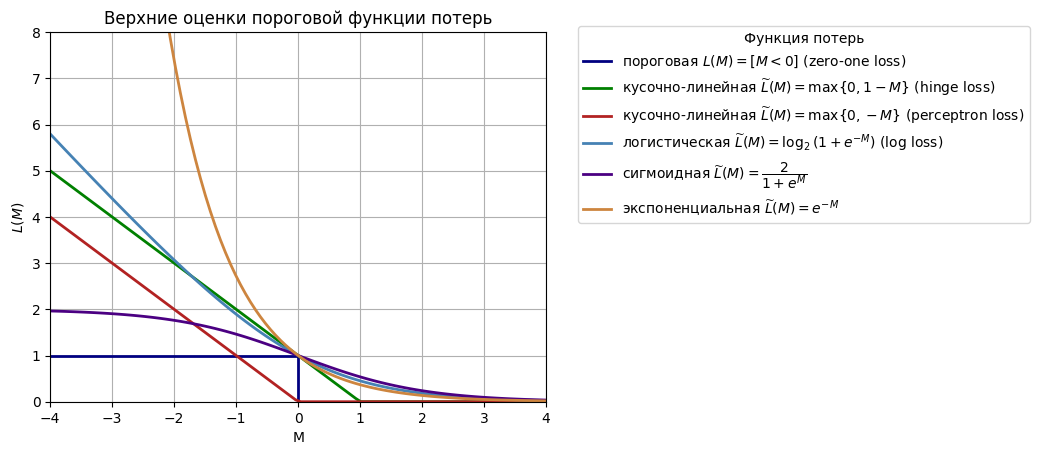

Любая из них подойдёт для обучения линейного классификатора.

### Регуляризация

Регуляризация выполняется также, как в случае линейной
регрессии.

#### $L_1$-регуляризация

Обучение
$$ \sum\limits_{i=1}^\ell \widetilde L( y_i \cdot \sign\langle \bar w, \bar x_i \rangle) \; + λ \cdot \| \bar{w} \|_1  \; \to \; \min\limits_{\bar w}$$

где   
$\| \bar{w} \|_1 = \sum\limits_{j=1}^d |w_j| \;$ (свободный коэффициент $w_0$ не участвует в регуляризации),  
$λ$ – коэффициент регуляризации.



#### $L_2$-регуляризация

$$ \sum\limits_{i=1}^\ell \widetilde L( y_i \cdot \sign\langle \bar w, \bar x_i \rangle) + λ \cdot \| \bar{w} \|_2^2  \; \to \; \min\limits_{\bar w} . $$
где   
$\| \bar{w} \|_2^2 = \sum\limits_{j=1}^d w_j^2,$   
$λ$ – коэффициент регуляризации.

## Работа с моделями линейной классификации в библиотеке *Scikit-learn*

### Генерация наборов данных

Метод *make_blobs* из модуля *datasets* генерирует набор данных в виде
нескольких облаков точек, принадлежащих разным классам, с рассеиванием.

<pre><code>X,y = make_blobs(параметры)</pre></code>

В числе параметров метода:
* *n_samples* – общее количество генерируемых точек,
* *n_features* – количество признаков,
* *centers* – количество классов,
* *cluster_std* – стандартное отклонение для нормального закона, определяющего рассеивание точек,
* *random_state* – номер генератора случайных чисел (задается, если требуется воспроизводимость результатов)  
и пр.

Метод возвращает сформированный массив координат точек и
массив меток классов.

[Документация метода *make_blobs*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

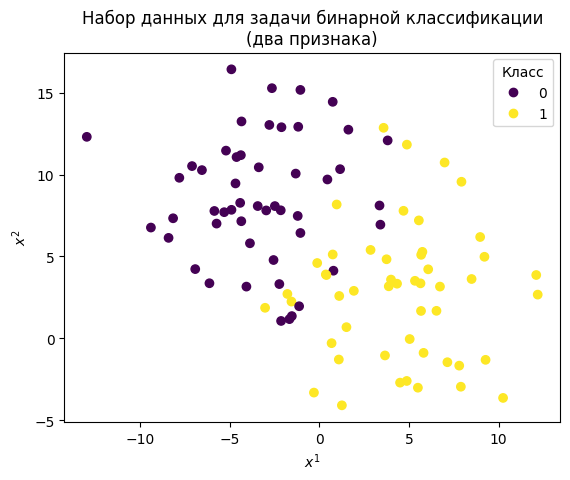

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=4, random_state=42)
scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Набор данных для задачи бинарной классификации\n(два признака)')
plt.show()

Метод *make_classification* из модуля *datasets* генерирует генерирует набор данных в виде нескольких облаков точек, принадлежащих разным классам, с рассеиванием. Данный метод позволяет выполнять более тонкую настройку генерируемого набора, чем *make_blobs*.

<pre><code>X,y = make_classification(параметры)</pre></code>

В числе параметров метода:
* *n_samples* – общее количество генерируемых точек
* *n_features* – общее количество признаков
* *n_informative* – количество информативных признаков (из общего количества)
* *n_redundant* – количество линейно-зависимых признаков (из общего количества),
* *n_classes* – количество классов,
* *n_clusters_per_class* – количество облаков точек для каждого класса (при этом должно быть выполнено условие $ \text {n_classes} \cdot \text {n_clusters_per_class} \le  2^{\text {n_informative}}$)
* *class_sep* – коэффициент, определяющий рассеивание точек,
* *random_state* – номер генератора случайных чисел (задается, если требуется воспроизводимость результатов)  
и пр.

Метод возвращает сформированный массив координат точек и
массив меток классов.

[Документация метода *make_classification*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)

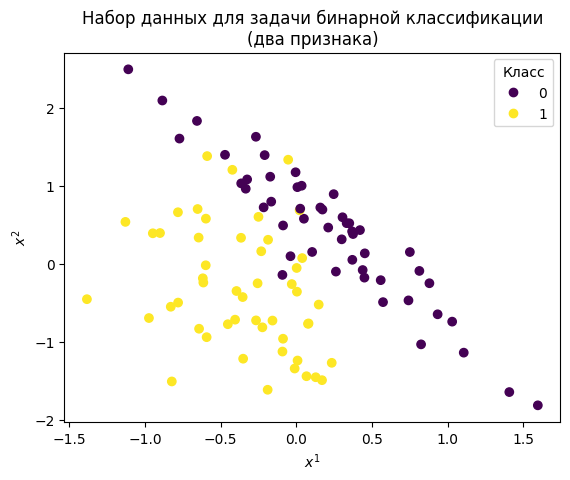

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.3, random_state=40)
scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Набор данных для задачи бинарной классификации\n(два признака)')
plt.show()

### Создание и обучение модели линейного классификатора

#### *Ridge*-классификатор

Методы работы с моделями линейной классификации с
применением $L_2$-регуляризациии реализованы в классе *RidgeClassifier* модуля *linear_model*.

Основные параметры, приемы построения моделей и получения прогнозов такие же, что и в классах *LinearRegression*, *Lasso* и *Ridge*.

[Документация класса *RidgeClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)

Создадим и обучим модель *RidgeClassifier* с параметрами по умолчанию на данных из ранее рассмотренного набора:

In [9]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()  # создание экземпляра класса RidgeClassifier с параметрами по умолчанию
clf.fit(data.iloc[:,:-1], data['Класс']) # обучение модели на всех имеющихся данных

RidgeClassifier()

Посмотрим на значения весов:

In [10]:
# вектор весов признаков
clf.coef_

array([[ 0.10319831, -0.05561909]])

In [11]:
# свободный коэффициент
clf.intercept_

array([0.26104403])

Таким образом, обученная модель имеет вид $a(x)=0.26 + 0.1 \cdot x^1 - 0.06 \cdot x^2$.

Построим разделяющую прямую:

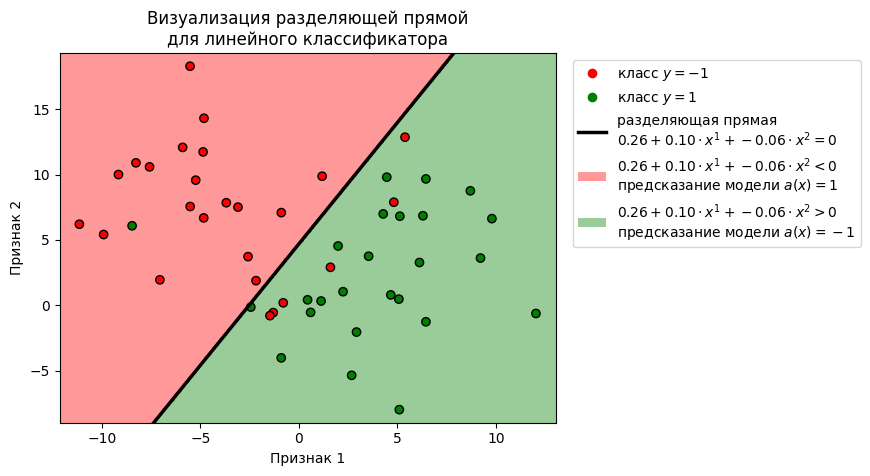

In [12]:
w_0 = clf.intercept_[0]
w_1,w_2 = clf.coef_[0]

# области по разные стороны от разделющей прямой
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(clf, data.iloc[:,:-1], response_method="predict", grid_resolution=200, cmap=colors, alpha=0.4)
# разделяющая прямая
x_line = np.array([x1_min, x1_max])
y_line = -(w_0 + w_1 * x_line) / w_2
line = plt.axline(*zip(x_line,y_line), linewidth=2.5, color='k')
# объекты из набора данных
scatter = plt.scatter(X_1, X_2, c=data['Класс'], cmap=colors, edgecolor='k')
# оформление: легенда и названия
handles = scatter.legend_elements()[0] + [line] + [disp.surface_.legend_elements()[0][0],disp.surface_.legend_elements()[0][-1]]
eq = f'{w_0:.2f} + {w_1:.2f} \cdot x^1 + {w_2:.2f} \cdot x^2'
labels = ([f'класс $y=${i}' for i in scatter.legend_elements()[1]]
          + [f'разделяющая прямая\n${eq}=0$',
          f'${eq}<0$\nпредсказание модели $a(x)=1$',
          f'${eq}>0$\nпредсказание модели $a(x)=-1$'])
plt.legend(handles=handles, labels=labels, bbox_to_anchor=[1.02, 1])
plt.title(f'Визуализация разделяющей прямой\nдля линейного классификатора')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()

Для подбора коэффициента регуляризации, обеспечивающего наименьшее значение функции ошибки, можно использовать класс *RidgeClassifierCV* из модуля *linear_model*. Основные приемы работы те же, что в классе *LassoCV* и *RidgeCV*.

[Документация класса *RidgeClassifierCV*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html)

#### *SGD*-классификатор

В классе *SGDClassifier* из модуля *linear_model* реализованы методы для работы с моделью линейной классификации, обучаемой с помощью стохастического градиентного спуска.

Основные параметры, приемы построения моделей и получения прогнозов такие же, что и в классе *SGDRegressor*.

[Документация класса *SGDClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

[Описание функций потерь, использующихся в *SGDClassifier*](https://scikit-learn.org/stable/modules/sgd.html#sgd-mathematical-formulation)



## Метрики качества в задаче бинарной классификации

#### Матрица ошибок

В задаче бинарной классификации для каждого объекта $x$ возможно четыре ситуации:

* модель предсказала $a(x) = 1$ и это был верный ответ   

 Будем относить такие объекты к *true positive* (__TP__) группе  
 (*true* – потому что предсказание правильное, а *positive* – потому что модель предсказала положительную метку);

* модель предсказала $a(x) = 1$ и это был неверный овет  

  Будем относить такие объекты к *false positive* (__FP__) группе   
  (*false* – потому что предсказание неправильное)

* модель предсказала $a(x) = -1$ и это был верный ответ   

 Будем относить такие объекты к *true negative* (__TN__) группе  
 (*negative* – потому что модель предсказала отрицательную метку);

* модель предсказала $a(x) = -1$ и это был неверный ответ   

 Будем относить такие объекты к *false negative* (__FN__) группе

Если подсчитать по всей выборке количество объектов в каждой категории, то получим __матрицу ошибок__:




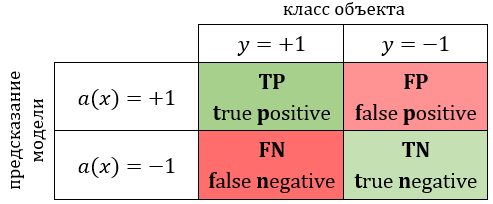

Если предсказание модели на объекте $a(x) = 1$ , то говорят, что алгоритм сработал на объекте $x$, а если $a(x) = -1$ то говорят, что алгоритм пропускает объект $x$. Поэтому **TP** – верное срабатывание, **FP** – ложное срабатывание, **TN** – истинный пропуск, **FN** – ложный пропуск.

##### Реализация в *Scikit-learn*

Для вычисления матрицы ошибок есть функция *confusion_matrix* из модуля *metrics*.

В случае задачи бинарной классификации функция возвращает матрицу $C$ размерности $2  \times  2$.
Элемент $c_{ij}$ это количество объектов, которые относятся к классу $i$ , но отнесены классификатором к классу $j$. На главной диагонали матрицы – количество правильно классифицированных объектов каждого класса; вне главной диагонали – количество ошибочно классифицированных объектов (по классам).

<pre><code>confusion_matrix(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *confusion_matrix*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Для визуализации матрицы можно использовать класс *ConfusionMatrixDisplay* из модуля *metrics*.

<pre><code>имя объекта = ConfusionMatrixDisplay(матрица ошибок)
имя объекта.plot()</pre></code>

По умолчанию метод отображает метки класов вида $0,1,..$. Для задания других меток используется параметр *display_labels*.

[Документация класса *ConfusionMatrixDisplay*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

Рассмотрим работу с метриками качества на примере одного из учебных наборов данных, имеющихся в библиотеке *Scikit-learn*. Это набор данных о раке молочной железы. На основе биопсий опухолей были получены различные характеристики ядер клеток (такие как радиус ядра, его текстура, симметричность и т.д.).

[Описание набора данных](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

In [13]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
data.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

В наборе содержатся 569 записей, 30 числовых признаков. Пропусков нет.

Посмотрим на целевую переменную:



In [15]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

Это задача бинарной классификации, меткой $0$ обозначены злокачественные опухоли, меткой $1$ – доброкачественные. Поскольку cточки зрения задачи предсказания злокачественности опухоли срабатывание алгоритма это обнаружение рака, то поменяем обозначение меток, чтобы "положительный" класс 1 означал злокачественность опухоли.

In [17]:
y = 1 - data.target
y.value_counts()

target
0    357
1    212
Name: count, dtype: int64

В наборе 37% объектов с "положительным" классом (злокачественные опухоли) и 63% – c "отрицательным" (доброкачественные опухоли).

Обучим *Ridge*-классификатор, предварительно масштабировав данные.

In [18]:
# разбиение на обучающую и тестовую выборки
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# масштабирование входных признаков в обучающей выборке
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# обучение модели на обучающей выборке
clf = RidgeClassifier()
clf.fit(X_train, y_train)

RidgeClassifier()

Посмотрим на матрицу ошибок обученного классификатора на тестовой выборке:

Матрица ошибок, полученная методом confusion_matrix
 [[88  1]
 [ 3 51]]


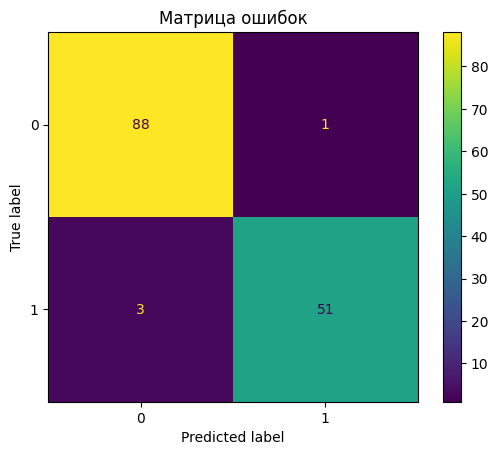

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# масштабируем входные признаки в тестовой выборке
X_test = scaler.transform(X_test)
# получаем предсказание модели по тестовой выборке
y_pred_clf = clf.predict(X_test)
# матрица ошибок
cm = confusion_matrix(y_test, y_pred_clf)
print('Матрица ошибок, полученная методом confusion_matrix\n', cm)
# визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

Видим, что модель правильно классифицировала объекты в большинстве случаев, но допустила 4 ошибки: три раза пропустила раковую опухоль (**FN**) и один раз неверно поставила диагноз "рак" (**FР**).

Для сравнения обучим *SCG*-классификатор c $L_1$ регуляризацией.

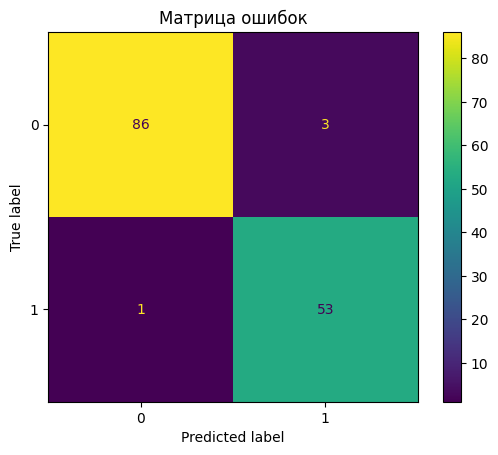

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(penalty='l1', alpha=0.001, random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred_sgd = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

❓ **Упражнение**: дайте интепретацию значениям в полученной матрице ошибок. Подумайте, какую из двух моделей вы бы назвали лучшей и на каком основании.

#### Доля правильных ответов (*accuracy*)

Наиболее очевидной метрикой качества в задаче классификации является доля правильных ответов, которую мы уже упоминали:

$$\text{accuracy}(a, X)=\frac {1}{\ell} \sum\limits_{i=1}^\ell \; [a(\bar x_i) = y_i]$$

Или, если учесть обозначения в матрице ошибок:

$$\text{accuracy}(a, X)=\frac {\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

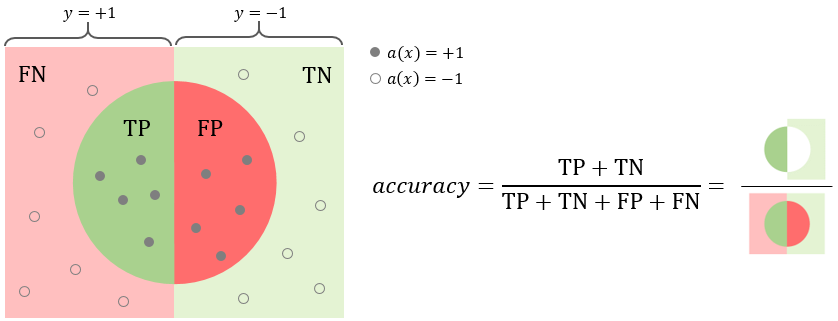

У *accuracy* есть ряд серьезных недостатков:

* не позволяет адекватно оценить качество алгоритма в случае дисбаланса классов в обучающей выборке.   
Например, в задаче диагностики редких заболеваний классификатор, предсказывающий всем пациентам отсутствие болезни будет иметь достаточно высокую *accuracy* просто потому, что больных людей в выборке намного меньше.

* не учитывает цену ошибки на объектах разных классов.    
В той же задаче предсказания злокачественности опухоли: ошибочно отрицательный вердикт (пропустить раковую опухоль) гораздо хуже ошибочного положительного диагноза (увидеть признаки рака в доброкачественной опухоли).

##### Реализация в *Scikit-learn*

Для вычисления доли правильных ответов есть функция *accuracy_score* из модуля *metrics*.

<pre><code>accuracy_score(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *accuracy_score*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Сравним два наших обученных классификатора по значениям метрики *accuracy* на тестовой выборке:

In [21]:
from sklearn.metrics import accuracy_score

print('Ridge-классификатор', accuracy_score(y_test, y_pred_clf))
print('SCG-классификатор', accuracy_score(y_test, y_pred_sgd))

Ridge-классификатор 0.972027972027972
SCG-классификатор 0.972027972027972


По доле правильных ответов обе модели имеют одинаковое качество: в 97% случаев алгоритм давал верный ответ.

Только с *accuracy* не получится выбрать лучшую модель из двух (хотя мы видели разницу между моделями на матрицах ошибок). Обратимся к другим метрикам качества классификации,
которые позволяют учесть различие в цене ошибок разных
типов.

#### Точность (*precision*)

Точность показывает долю верно предсказанных положительных объектов среди всех предсказаний положительного класса:

$$
\text{precision}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

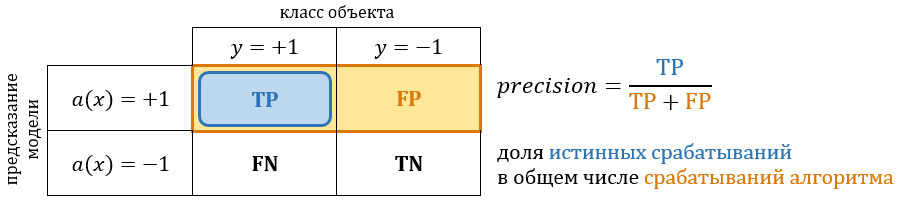

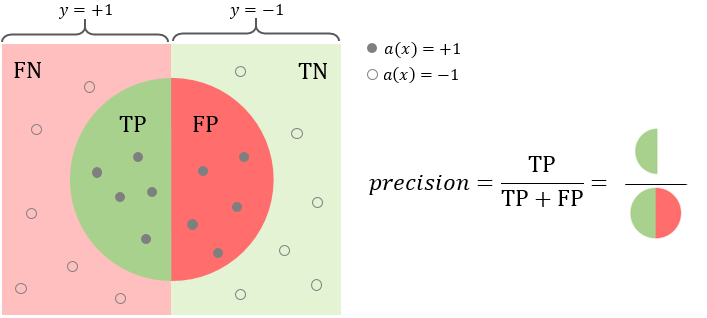

##### Реализация в *Scikit-learn*

Для вычисления точности есть функция *precision_score* из модуля *metrics*.

<pre><code>precision_score(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *precision_score*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

Сравним два наших обученных классификатора по значениям метрики *precision* на тестовой выборке:

In [22]:
from sklearn.metrics import precision_score

print('Ridge-классификатор', precision_score(y_test, y_pred_clf))
print('SCG-классификатор', precision_score(y_test, y_pred_sgd))

Ridge-классификатор 0.9807692307692307
SCG-классификатор 0.9464285714285714


В контексте задачи предсказания злокачественности опухоли точность показывает, сколько из определенных алгоритмом как злокачественные опухолей действительно являются злокачественными. *Ridge*-классификатор по метрике *precision* показывает более высокое качество классификации, чем *SGD*-классификатор.

#### Полнота (*recall*)

Полнота показывает долю верно предсказанных положительных объектов среди всех положительных объектов в данных:

$$
\text{recall}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

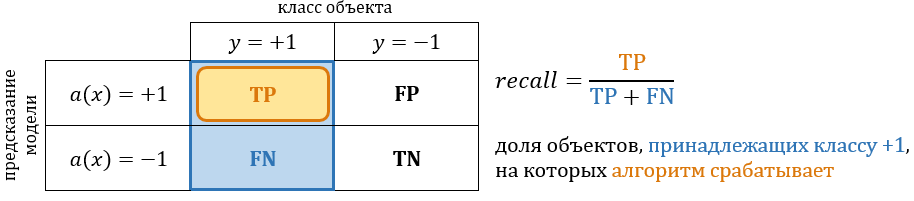

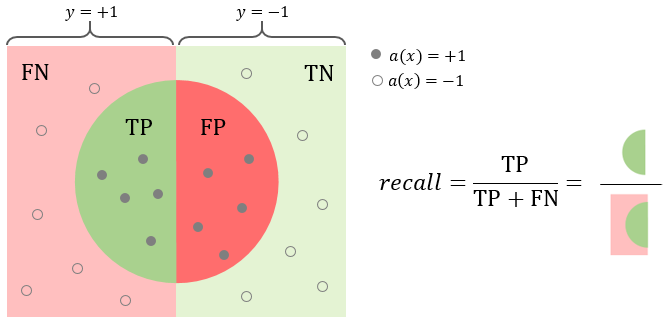

##### Реализация в *Scikit-learn*

Для вычисления полноты есть функция *recall_score* из модуля *metrics*.

<pre><code>recall_score(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *recall_score*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

Сравним два наших обученных классификатора по значениям метрики *recall* на тестовой выборке:

In [23]:
from sklearn.metrics import recall_score

print('Ridge-классификатор', recall_score(y_test, y_pred_clf))
print('SCG-классификатор', recall_score(y_test, y_pred_sgd))

Ridge-классификатор 0.9444444444444444
SCG-классификатор 0.9814814814814815


В контексте задачи предсказания злокачественности опухоли полнота показывает, какую долю злокачественных опухолей смог выявить алгоритм. *SGD*-классификатор по метрике *recall* показывает более высокое качество классификации, чем *Ridge*-классификатор.

#### *F*-мера

Чем выше точность и полнота, тем лучше модель. Но на практике их максимальные значения одновременно недостижимы, поэтому приходится искать баланс между ними. Для этого используется *F*-мера - это метрика, находящая некоторый баланс между точностью и полнотой. Ее значение - это их гармоническое среднее:

$$
\text{F}(a, X) = 2 \, \frac{\text{precision}(a, X)\cdot\text{recall}(a, X)}{\text{precision}(a, X) + \text{recall}(a, X)}
$$

##### Реализация в *Scikit-learn*

Для вычисления *F*-меры есть функция *f1_score* из модуля *metrics*.

<pre><code>f1_score(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *f1_score*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Сравним два наших обученных классификатора по значениям *F*-меры на тестовой выборке:

In [24]:
from sklearn.metrics import f1_score

print('Ridge-классификатор', f1_score(y_test, y_pred_clf))
print('SCG-классификатор', f1_score(y_test, y_pred_sgd))

Ridge-классификатор 0.9622641509433962
SCG-классификатор 0.9636363636363636


Разница в значении метрики незначительная. По балансу точности и полноты оба классификатора показывают почти одинаковое качество классификации.

❓ **Упражнение**: после вычисления всех метрик качества классификации, какую из двух обученных моделей вы бы назвали лучшей?

## Задача многоклассовой классификации

Задача бинарной классификации возникает в случае, когда пространство возможных ответов представляет собой множество $\mathcal Y = \{1, 2, \dots , K\}$ (либо $\mathcal Y = \{0, 1, \dots , K-1\}$). То есть каждый объект в наборе данных принадлежит к одному из $K$ классов.

Вполне естественно попытаться свести задачу многоклассовой классификации к набору задач бинарной классификации.

Рассмотрим два наиболее популярных подхода на примере задачи трехклассовой классификации по двум признакам.

Сгенерируем небольшой набор данных:

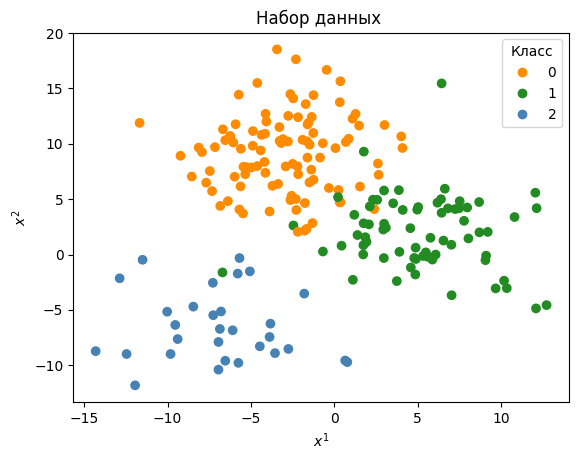

In [25]:
# набор данных: три класса по 50 объектов, два признака
X,y = make_blobs(n_samples=[100,70,30], n_features=2, cluster_std=3.5, random_state=42)
# используем свою палитру цветов
color_list = ['darkorange', 'forestgreen', 'steelblue']
colors = ListedColormap(color_list)
# визуализация набора данных
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.legend(*scatter.legend_elements(), title='Класс')
plt.title('Набор данных ')
plt.show()

### Подход «один против всех»

Обучим $K$ линейных классификаторов $b_1(x), \dots, b_K(x)$, выдающих оценки принадлежности классам $1, \dots , K$ соответственно. Каждый из классификаторов
$b_k(x) = \sign \langle \bar w_k, \bar x \rangle$ будем обучать по выборке $\left (x_i, 2[y_i=k]-1\right )^\ell_{i=1} $, то есть классификатор с номером $k$ будем учить отличать $k$-ый класс от всех остальных.



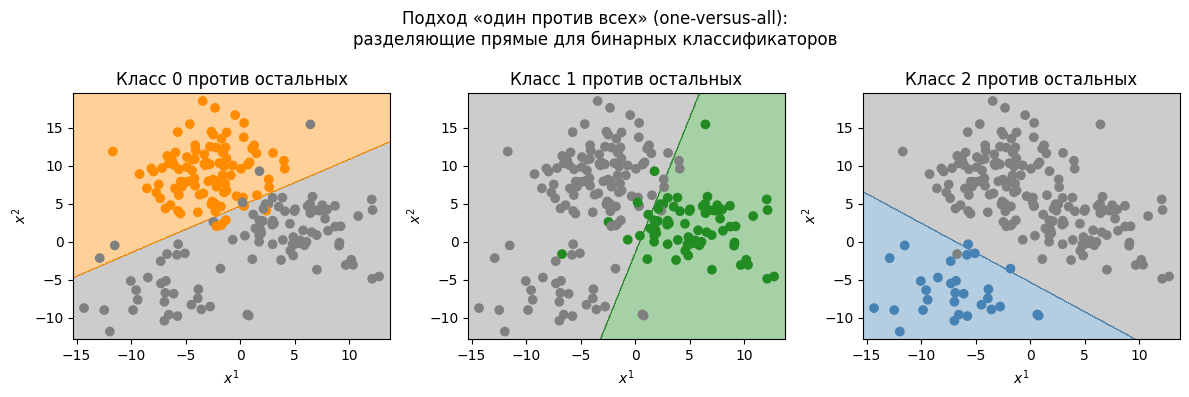

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
clf = []
Y = []
# для каждого класса в наборе данных
for k in np.unique(y):
  # текущему классу присваиваем метку 1, всем остальных классам - метку -1
  y_k = np.where(y==k, 1, -1)
  Y.append(y_k)
  # обучаем Ridge-классификатор с параметрами по умолчанию
  clf_k = RidgeClassifier()
  clf_k.fit(X, y_k)
  clf.append(clf_k)
  # визуализируем разделяющую прямую
  colors_k = ListedColormap(['gray', color_list[k]])
  DecisionBoundaryDisplay.from_estimator(clf_k, X, response_method="predict", grid_resolution=400, ax=axes[k], cmap=colors_k, alpha=0.4)
  axes[k].scatter(X[:,0], X[:,1], c=y_k, cmap=colors_k)
  axes[k].set_title(f'Класс {k} против остальных')
  axes[k].set_xlabel('$x^1$')
  axes[k].set_ylabel('$x^2$')
plt.suptitle('Подход «один против всех» (one-versus-all):\nразделяющие прямые для бинарных классификаторов')
plt.tight_layout()

Логично, чтобы итоговый классификатор выдавал класс, соответствующий предсказанию самого "уверенного" из бинарных классификаторов. Мы видели, что "уверенность" классификатора можно оценить с помощью значения $\langle \bar w_k, \bar x \rangle$.

Сравним эти значения:

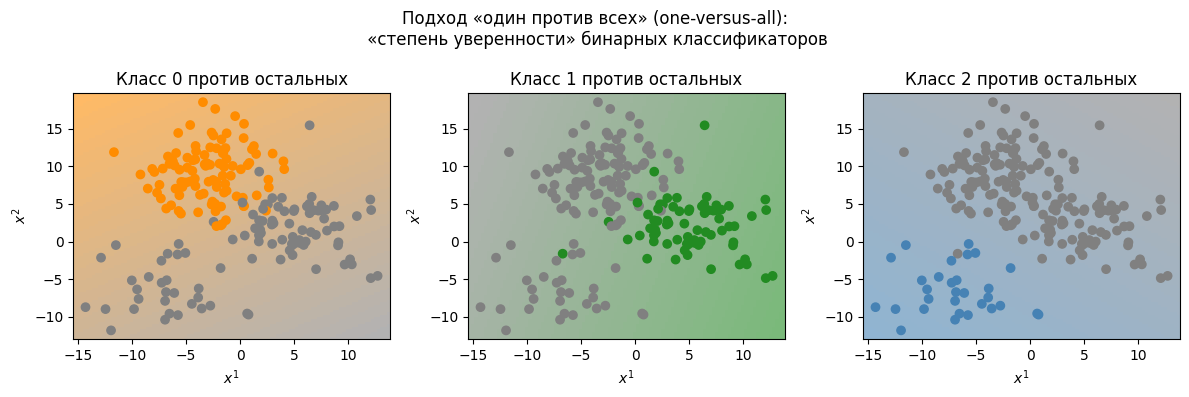

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for k in np.unique(y):
  colors_k = ['gray',color_list[k]]
  from matplotlib.colors import LinearSegmentedColormap
  cm = LinearSegmentedColormap.from_list('custom', colors_k, N=30)
  DecisionBoundaryDisplay.from_estimator(clf[k], X, response_method="decision_function", plot_method="pcolormesh", ax=axes[k], cmap=cm, alpha=0.6)
  axes[k].scatter(X[:,0], X[:,1], c=Y[k], cmap=ListedColormap(colors_k))
  axes[k].set_title(f'Класс {k} против остальных')
  axes[k].set_xlabel('$x^1$')
  axes[k].set_ylabel('$x^2$')
plt.suptitle('Подход «один против всех» (one-versus-all):\n «степень уверенности» бинарных классификаторов')
plt.tight_layout()

Для каждого объекта-точки выберем тот класс, которому соответствует большее значение $\langle \bar w_k, \bar x \rangle$, то есть ответ самого «уверенного» классификатора:
$$a(x) = \DeclareMathOperator*{\argmax}{arg\,max} \argmax\limits_{k \in \{1, \dots, K \}} \langle \bar w_k, \bar x \rangle$$


In [28]:
# на примере одного объекта из набора
i = np.random.randint(X.shape[0])
x = [X[i]]
wx = [clf[0].decision_function(x),clf[1].decision_function(x),clf[2].decision_function(x)]
print(f'Степень уверенности бинарных классификаторов для объекта {tuple(X[i])}:\n')
for k, df in enumerate(wx):
  print(f'Классификатор {k} vs all:', *df)

print('\nПредсказание многоклассового классификатора:', np.argmax(wx))

Степень уверенности бинарных классификаторов для объекта (-9.818653638783987, -8.977983852330023):

Классификатор 0 vs all: -0.8702046342307973
Классификатор 1 vs all: -1.0035806413463584
Классификатор 2 vs all: 0.8737852755771567

Предсказание многоклассового классификатора: 2


In [29]:
# предсказание многоклассового классификатора для объектов в наборе данных
wx = list(zip(clf[0].decision_function(X),clf[1].decision_function(X),clf[2].decision_function(X)))
np.argmax(np.array(wx), axis=1)

array([0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 0])

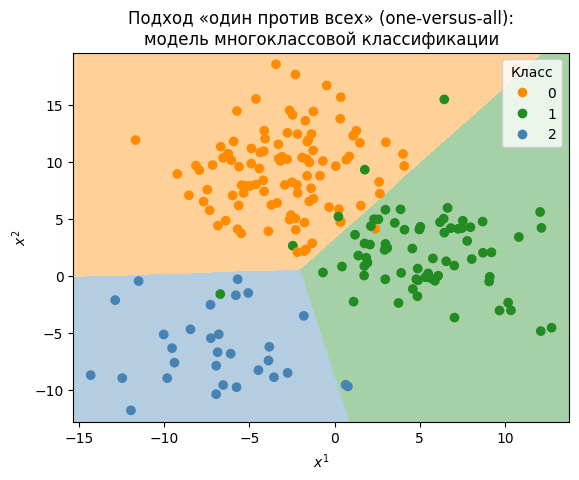

In [30]:
# визуализация разделяющих линий многоклассового класификатора
n = 500
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, n)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, n)
xx, yy = np.meshgrid(xx, yy)
z = np.dstack((xx,yy)).reshape(-1,2)
wx = list(zip(clf[0].decision_function(z), clf[1].decision_function(z), clf[2].decision_function(z)))
a = np.argmax(np.array(wx), axis=1).reshape(xx.shape)
plt.pcolormesh(xx, yy, a, cmap=colors, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(*scatter.legend_elements(), title='Класс')
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('Подход «один против всех» (one-versus-all):\nмодель многоклассовой классификации')
plt.show()

Класс *SGDClassifier* использует именно этот подход в задачах многоклассовой классификации.

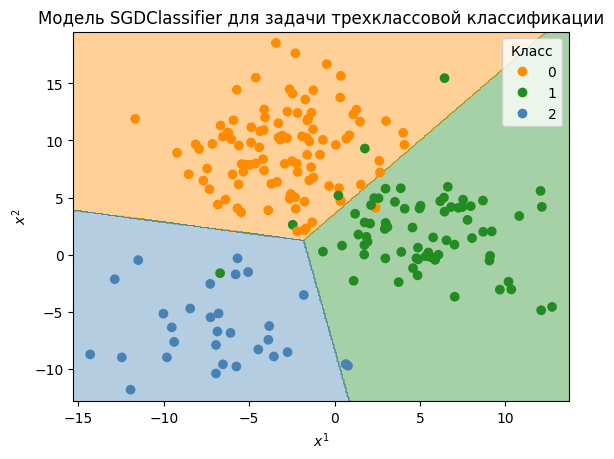

In [31]:
clf = SGDClassifier(random_state=42)
clf.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", grid_resolution=400, cmap=colors, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(*scatter.legend_elements(), title='Класс')
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('Модель SGDClassifier для задачи трехклассовой классификации')
plt.show()

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
code_y_train = encoder.fit_transform(y_train.reshape(-1, 1))
names = [s[3:] for s in encoder.get_feature_names_out()]
print(names)
code_y_train

Получили 3 бинарных признака. Можно рассмотреть процесс классификации как троекратное применение бинарной классификации.  
В таком случае, если найдётся такой объект, который не относится ни к одному классу из текущих, то мы сможем открыть объект нового класса.

### Подход «все против всех»

Обучим $C^2_K$ линейных классификаторов $a_{ij}(x), \; i,j=1, \dots ,K, \: i\ne j$. Каждый из классификаторов
$a_{ij}(x)$ будем обучать по подвыборке $X_{ij} \subset X$, содержащей только
объекты классов $i$ и $j$. Соответственно, классификатор $a_{ij}(x)$ будет выдавать для любого объекта либо класс $i$, либо класс $j$.

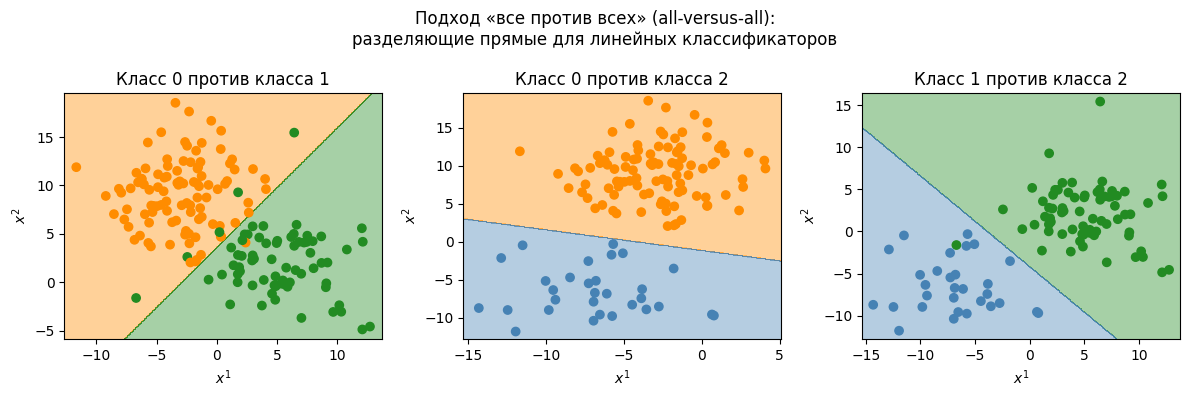

In [32]:
from itertools import combinations
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
clf = []
for k, classes in enumerate(combinations(np.unique(y), 2)):
  # формируем подвыборку
  X_k = X[np.isin(y, classes)]
  y_k = y[np.isin(y, classes)]
  # обучаем Ridge-классификатор
  clf_k = RidgeClassifier()
  clf_k.fit(X_k, y_k)
  clf.append(clf_k)
  # визуализируем разделяющую прямую
  colors_k = ListedColormap([color_list[classes[0]],color_list[classes[1]]])
  DecisionBoundaryDisplay.from_estimator(clf_k, X_k, response_method="predict", grid_resolution=400, ax=axes[k], cmap=colors_k, alpha=0.4)
  axes[k].scatter(X_k[:,0], X_k[:,1], c=y_k, cmap=colors_k)
  axes[k].set_title(f'Класс {classes[0]} против класса {classes[1]}')
  axes[k].set_xlabel('$x^1$')
  axes[k].set_ylabel('$x^2$')
plt.suptitle('Подход «все против всех» (all-versus-all):\nразделяющие прямые для линейных классификаторов')
plt.tight_layout()

Чтобы классифицировать объект, подадим его на вход каждого из обученных бинарных классификаторов. Каждый из них проголосует за своей класс;
в качестве ответа многоклассового классификатора выберем тот класс, за который наберется больше всего голосов:

$$a(x) = \DeclareMathOperator*{\argmax}{arg\,max} \argmax\limits_{k \in \{1, \dots, K \}} \sum\limits_{i=1}^{K} \sum\limits_{i \ne j} \, [a_{ij}(x)=k]$$

In [33]:
# функция для голосования
def vote(clf_predict,y):
  vote_list = [np.sum(clf_predict==k) for k in np.unique(y)]
  if (vote_list == np.full(np.unique(y).size, 1)).all(): # случай равного числа голосов
    return np.unique(y).size # возвращаем фиктивный K+1 класс для нового цвета
  else:
    return np.argmax(vote_list)

In [34]:
# на примере одного объекта из набора
i = np.random.randint(X.shape[0])
x = [X[i]]
clf_predict = [clf[0].predict(x),clf[1].predict(x),clf[2].predict(x)]
print(f'Предсказание бинарных классификаторов для объекта {tuple(X[i])}:\n')
for k, classes in enumerate(combinations(np.unique(y), 2)):
  print(f'Класс {classes[0]} против класса {classes[1]}:', *clf_predict[k])

print('\nПредсказание многоклассового классификатора:', vote(clf_predict,y))

Предсказание бинарных классификаторов для объекта (7.041789502538899, -3.6713358652230488):

Класс 0 против класса 1: 1
Класс 0 против класса 2: 2
Класс 1 против класса 2: 1

Предсказание многоклассового классификатора: 1


In [35]:
# предсказание многоклассового классификатора для объектов в наборе данных
clf_predict = list(zip(clf[0].predict(X),clf[1].predict(X),clf[2].predict(X)))
np.array([vote(i, y) for i in clf_predict])

array([0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 0])

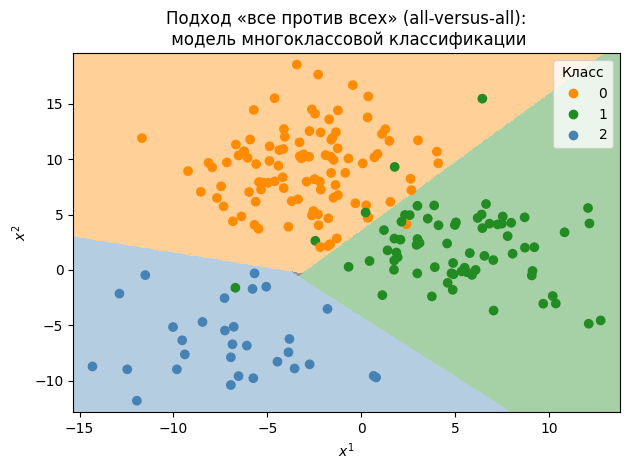

In [36]:
# визуализация разделяющих линий многоклассового класификатора
color_list = ['darkorange', 'forestgreen', 'steelblue']
colors = ListedColormap(color_list)
colors_area = ListedColormap(color_list + ['k'])
n = 500
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, n)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, n)
xx, yy = np.meshgrid(xx, yy)
z = np.dstack((xx,yy)).reshape(-1,2)
clf_predict = list(zip(clf[0].predict(z),clf[1].predict(z),clf[2].predict(z)))
classes = np.array([vote(i, y) for i in clf_predict]).reshape(xx.shape)
plt.pcolormesh(xx, yy, classes, cmap=colors_area, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(*scatter.legend_elements(), title='Класс')
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('Подход «все против всех» (all-versus-all):\n модель многоклассовой классификации')
plt.tight_layout()

Обратите внимание на  маленький серый треугольник на стыке областей. Это объекты, для которых голоса разделились (у каждого класса было по одному голосу). Для этих объектов нет явного способа выдать обоснованное предсказание.

### Метрики качества в задаче многоклассовой классификации

В задаче многоклассовой классификации, как правило, стараются свести оценку качества к вычислению одной из рассмотренных раннее метрик бинарной классификации. Выделяют два подхода к такому сведению: микро- и макроусреднение.

Пусть выборка состоит из $K$ классов. Рассмотрим $K$ задач бинарной классификации, каждая из которых заключается в отделении своего класса $k$ от остальных ($k=1, \dots , K$) (подход «один против всех»). Для каждой из них можно посчитать свою матрицу ошибок. Отметим, что в задаче бинарной класификации все метрики качества, которые мы изучали, выражались через элементы матрицы ошибок.

Далее можно использовать один из подходов для получения итогового значения метрики качества из составленных матриц ошибок:

* Усредняем элементы матрицы ошибок (*TP*, *FP*, *TN*, *FN*) между бинарными классификаторами, например $\overline {TP} = \frac {1}{K} \sum\limits_{k=1}^K {TP}_k $. Затем по полученной усреднённой матрице ошибок считаем метрики как при оценке качеcтва бинарной классификации. Это называют микроусреднением (*micro average*)

* Считаем метрики качества для каждого бинарного классификатора отдельно, а потом усредняем. Это называют макроусреднением (*macro average*).

Порядок усреднения влияет на результат в случае дисбаланса классов:  усреднение первым способом сделает вклад маленького класса в общую метрику незаметным. А при усреднении вторым способом среднее считается уже для нормированных величин, так что вклад каждого класса будет одинаковым. Учесть дисбаланс классов при макроусреднении можно, если заменить среднее вычислением взвешенного среднего (*weighted average*), где в качестве весов используются доли каждого класса в общей выборке.

#### Реализация в *Scikit-learn*

Функция *confusion_matrix* позволяет получить значения в матрице ошибок и для задачи многоклассовой классификации. В этом случае функция возвращает матрицу $C$ размерности $k  \times  k$, где $k$ – количество классов.
Элемент $c_{ij}$ это количество объектов, которые относятся к классу $i$ , но отнесены классификатором к классу $j$. На главной диагонали матрицы – количество правильно классифицированных объектов каждого класса; вне главной диагонали – количество ошибочно классифицированных объектов (по классам).

Посмотрим на матрицу ошибок для *SGD*-классификатора, обученного на наборе данных для задачи трехклассовой классификации:

Матрица ошибок, полученная методом confusion_matrix
 [[99  1  0]
 [ 4 65  1]
 [ 0  2 28]]


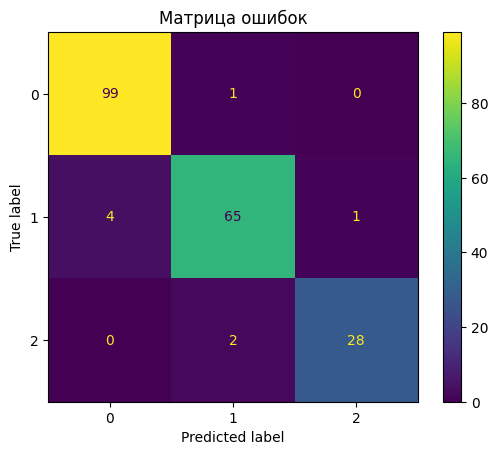

In [37]:
clf = SGDClassifier(random_state=42)
clf.fit(X, y)
# получаем предсказание модели по тестовой выборке
y_pred = clf.predict(X)
# матрица ошибок
cm = confusion_matrix(y, y_pred)
print('Матрица ошибок, полученная методом confusion_matrix\n', cm)
# визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Матрица ошибок')
plt.show()

Найдем сначала значение метрики *accuracy*. Доля правильных ответов это отношение количества верно классицированных объектов (сумма значений на главной диагонали матрицы ошибок) к общему количеству объектов (сумма всех значений в матрице ошибок):

$$\text {accuracy} = \frac {99+65+28}{99+1+0+4+65+1+0+2+28} = \frac {192}{200} = 0,96$$

Попробуем найти значение метрик *precision* и *recall* сначала отдельно для, например, класса 0:

*  *TP* для класса 0 это количество объектов класса 0, для которых модель предсказала класс 0: $TP_0 = 99$;

*  *FP* для класса 0 это количество объектов, не входящих в класс 0 (то есть объектов классов 1 и 2), для которых модель предсказала класс 0: $FP_0 = 4 + 0 = 4$;

*  *TN* для класса 0 это количество объектов, не входящих в класс 0, для которых модель предсказала класс, отличный от класса 0, то есть это количество объектов классов 2 и 3, для которых модель предсказала класс 2 или 3: $TN_0 = 65 + 1 + 2 + 28 = 96$;

*  *FN* для класса 0 это количество объектов класса 0, для которых модель предсказала класс, отличный от класса 0: $FN_0 = 1 + 0 = 1$.

Получаем

$$\text{precision}_ {\, 0} = \frac{\text{TP}_0}{\text{TP}_0 + \text{FP}_0} = \frac {99}{99 + 4} = \frac {99}{103} \approx 0,9612$$

$$\text{recall}_{\, 0} = \frac{\text{TP}_0}{\text{TP}_0 + \text{FN}_0} = \frac {99}{99 + 1} = \frac {99}{100} = 0,99$$


❓ **Упражнение**: составьте матрицы ошибок и подсчитайте значения метрик *precision* и *recall* для классов 1 и 2.

Теперь найдем усредненные по классам значения для, например, метрики *precision*.

* микроусреднение

$$\overline {TP} = \frac{\text{TP}_0 + \text{TP}_1 + \text{TP}_2}{3} = \frac {99 + 65 + 28}{3} =  64$$

$$\overline {FN} = \frac{\text{FN}_0 + \text{FN}_1 + \text{FN}_2}{3} = \frac {4 + 3 + 1}{3} = \frac {8}{3}$$

$$\text{precision} = \frac{\overline {TP}}{\overline {TP} + \overline {FN}} = \frac {64}{64+\frac {8}{3}} = \frac {24}{25} = 0,96$$

* макроусреднение

$$\text{precision} = \frac{\text{precision}_0 + \text{precision}_1 + \text{precision}_2}{3} = \frac {\dfrac{99}{103} + \dfrac{65}{68} + \dfrac{28}{29}}{3} \approx 0,96085$$

* взвешенное усреднение

$$\text{precision} = \frac {\text{precision}_0 \cdot 100 + \text{precision}_1 \cdot 70 + \text{precision}_2 \cdot 30}{200} = \frac {\dfrac{99}{103} \cdot 100 + \dfrac{65}{68} \cdot 70  + \dfrac{28}{29} \cdot 30}{200} \approx 0,95997$$


❓ **Упражнение**: найдите значения метрики *recall* для каждого из трех способов усреднения.

Функция *classification_report* выводит сводную информации по метрикам качества для модели многоклассовой классификации. Отчет, формируемый функцией, содержит:
* долю правильных ответов,
* точность, полноту и *F*-меру по каждого классу отдельно,
* значения точности, полноты и *F*-меры, усредненные по всем классам (*macro average* и *weighted average*).

<pre><code>сlassification_report(массив правильных ответов, массив предсказанных моделью значений)</pre></code>

[Документация функции *сlassification_report*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.96      0.93      0.94        70
           2       0.97      0.93      0.95        30

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



Каждую из метрик можно получить отдельно, использовав соотвествующую функцию. Для точности, полноты и *F*-меры необходимо указать значение параметра *average*, задающее способ усреднения: *micro*, *macro* или *weighted*.

In [39]:
print(precision_score(y, y_pred, average='micro'))
print(precision_score(y, y_pred, average='macro'))
print(precision_score(y, y_pred, average='weighted'))

0.96
0.9608548809547255
0.9599689340081531


❓ **Упражнение**: вызовите функцию *recall_score* для каждого из трех способов усреднения и сравните ответы с полученными при вычислении "вручную".

## Подбор гиперпараметров модели с помощью инструментов *Scikit-learn*

Чтобы получить алгоритм с хорошей обобщающей способностью требуется подбор гиперпараметров. Гиперпараметры модели это такие параметры алгоритма, которые не могут быть получены из обучающей выборки. Например, коэффициент регуляризации (в случае использования регуляризатора) является гиперпараметром.

Для подбора гиперпараметров необходимо многократное обучение алгоритма с последующим сравнением как с помощью отложенной (тестовой) выборки,
так и с помощью кросс-валидации.

Попробуем поднять качество классификации для *SGD*-классификатора в задаче трехклассовой классификации, рассмотренной раннее, за счет подбора гиперпараметров.

Первым шагом будет определение списка всех доступных гиперпараметров модели.
Для этого нужно использовать метод *get_params* (определен для классов модуля *linear_model*). Метод возвращает словарь – перечень параметров модели с
заданными (явно или по умолчанию) значениями.



In [40]:
SGD = SGDClassifier(random_state=42)
# получение списка гиперпараметров модели
SGD.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Второй шаг это создание сетки параметров: словаря, в котором ключами будут названия параметров, а значениями этих ключей - списки тестируемых значений параметра (те значения, на которых будет обучаться и оцениваться модель).

Будем подбирать функцию потерь, тип регуляризатора, коэффициент регуляризации и количество итераций без улучшения качества перед остановкой алгоритма.

In [41]:
# задание словаря для сетки значений гиперпараметров
params_grid = {'loss': ['hinge', 'perceptron', 'huber'],
               'penalty': ['l1', 'l2'],
               'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
               'n_iter_no_change': np.arange(5,11)}

Для подбора гиперпараметров по созданой сетке служит класс *GridSearchCV* из модуля *model_selection*. Этот инструмент обучает модель в каждом из узлов созданной сетки и оценивает качество модели с использованием кросс-валидации.

<pre><code>имя объекта = GridSearchCV(имя модели, имя сетки, scoring=название метрики, cv=количество блоков кросс-валидации)</pre></code>

[Документация класса *GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[Список доступных метрик для параметра *scoring*](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

Будем использовать долю правильных ответов для оценки качества и разбиение на 5 блоков для кросс-валидации:

In [42]:
# подбор гиперпараметров
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SGD, params_grid, scoring='accuracy', cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'perceptron', 'huber'],
                         'n_iter_no_change': array([ 5,  6,  7,  8,  9, 10]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [43]:
# получение оценок моделей по всем наборам параметров
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_n_iter_no_change,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003337,0.001310,0.000814,0.000207,0.00001,hinge,5,l1,"{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_c...",0.950,0.95,0.950,0.925,0.975,0.950,0.015811,43
1,0.002879,0.000671,0.000697,0.000151,0.00001,hinge,5,l2,"{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_c...",0.950,0.95,0.925,0.925,0.925,0.935,0.012247,74
2,0.003080,0.000549,0.000664,0.000028,0.00001,hinge,6,l1,"{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_c...",0.975,0.95,0.950,0.925,0.975,0.955,0.018708,22
3,0.002539,0.000065,0.000655,0.000023,0.00001,hinge,6,l2,"{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_c...",0.975,0.95,0.950,1.000,0.975,0.970,0.018708,1
4,0.002642,0.000111,0.000626,0.000018,0.00001,hinge,7,l1,"{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_c...",0.925,0.90,0.950,0.950,0.950,0.935,0.020000,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.002318,0.000038,0.000568,0.000015,10,huber,8,l2,"{'alpha': 10, 'loss': 'huber', 'n_iter_no_chan...",0.800,0.85,0.825,0.825,0.825,0.825,0.015811,180
248,0.002423,0.000100,0.000577,0.000047,10,huber,9,l1,"{'alpha': 10, 'loss': 'huber', 'n_iter_no_chan...",0.500,0.50,0.500,0.500,0.500,0.500,0.000000,217
249,0.002414,0.000072,0.000580,0.000020,10,huber,9,l2,"{'alpha': 10, 'loss': 'huber', 'n_iter_no_chan...",0.800,0.85,0.825,0.825,0.825,0.825,0.015811,180
250,0.002470,0.000098,0.000594,0.000082,10,huber,10,l1,"{'alpha': 10, 'loss': 'huber', 'n_iter_no_chan...",0.500,0.50,0.500,0.500,0.500,0.500,0.000000,217


In [44]:
# лучшая по заданной метрике качества модель
clf.best_estimator_

SGDClassifier(alpha=1e-05, n_iter_no_change=6, random_state=42)

In [45]:
# лучший набор параметров модели
clf.best_params_

{'alpha': 1e-05, 'loss': 'hinge', 'n_iter_no_change': 6, 'penalty': 'l2'}

In [46]:
# значение метрики качества для лучшей модели
clf.best_score_

0.97

Доля правильных ответов поднялась с 0,96 (модель с параметрами по умолчанию) до 0,97. Учитывая особенности сгенерированного набора данных, это максимально достижимое для линейного классификатора значение метрики *accuracy*.

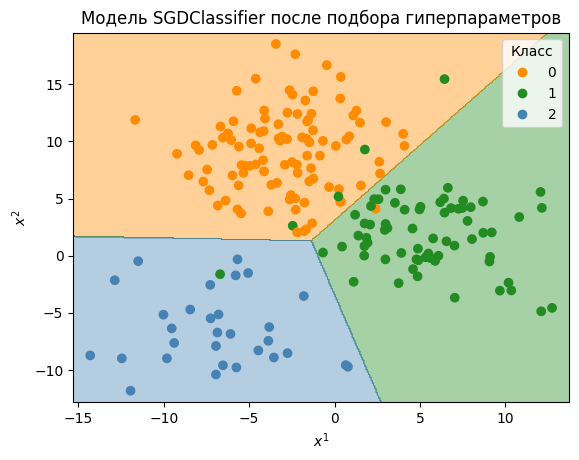

In [47]:
clf = clf.best_estimator_
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", grid_resolution=400, cmap=colors, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(*scatter.legend_elements(), title='Класс')
plt.xlabel('$x^1$')
plt.ylabel('$x^2$')
plt.title('Модель SGDClassifier после подбора гиперпараметров')
plt.show()

❓ **Упражнение**: классы в наборе данных не были сбалансированными. Был ли выбор метрики *accuracy* для оценки качества моделей в процессе подбора гиперпараметров целесообразным? Подумайте над выбором метрики и попробуйте провести подбор гиперпараметров.

Полный перебор по сетке для больших наборов данных неэффективен (при большом числе признаков и большом числе параметров требуется очень много ресурсов).
Альтернативой служит случайный поиск по сетке.

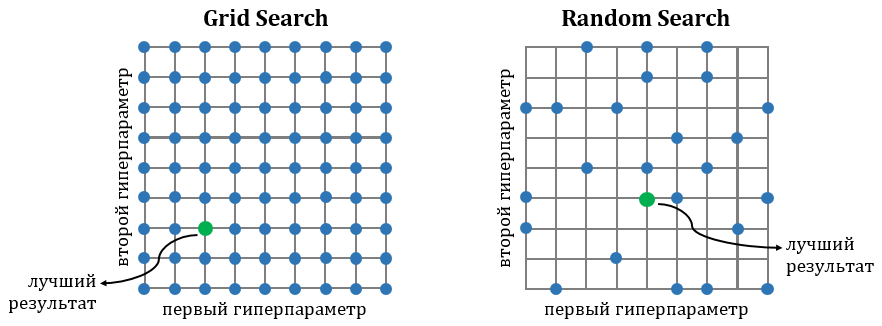

Анализ результатов, полученных на случайных узлах сетки, может быть полезен для сужения области поиска возможных  оптимальных значений гипераметров.

Для случайного поиска по сетке служит класс *RandomizedSearchCV* из модуля *model_selection*.

<pre><code>имя объекта = RandomizedSearchCV(имя модели, имя сетки, n_iter=число проверяемых узлов сетки, scoring=название метрики, cv=количество блоков кросс-валидации)</pre></code>

Создание объекта класса, его атрибуты и методы для работы с ним аналогичны *GridSearchCV*.

[Документация класса *RandomizedSearchCV*]( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)